## Instructions
------------
 
This file contains code that helps you get started on the logistic regression exercise. You will need to complete the following functions in this exericse:

* sigmoid.m
* costFunction.m
* predict.m
* costFunctionReg.m

<hr>

## Part 1: Loading and Plotting Data
---

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.
Number of Training Examples:  100


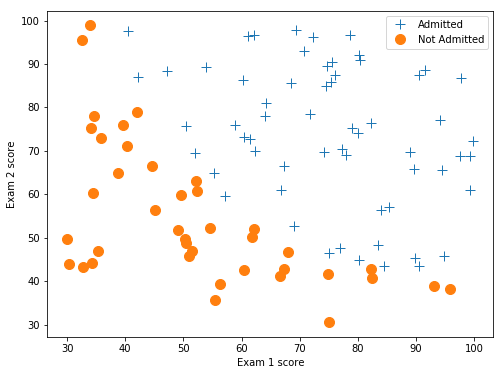

In [134]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')

data = pd.read_csv('ex2data1.txt', sep=",", header=None)

X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
m = len(y) # number of training examples

print('Number of Training Examples: ', m)

#Plot Data
fig = plt.figure(figsize=(8, 6))
plt.plot(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker='+',\
         markersize=10, linewidth=0, label='Admitted')
plt.plot(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker='o',\
         markersize=10, linewidth=0, label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

<hr>

## Part 2: Compute Cost and Gradient
---

In [135]:
import numpy as np

# Compute Sigmoid
def sigmoid(z):
    """
    SIGMOID Compute sigmoid function
    g = SIGMOID(z) computes the sigmoid of z.
    """
    g = np.zeros(z.shape)
    g = np.divide(1, (1 + np.exp(-z)))

    return g

In [136]:
# Compute cost and gradient
def costFunction(theta, X, y):
    """
    COSTFUNCTION Compute cost and gradient for logistic regression
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    parameter for logistic regression and the gradient of the cost
    w.r.t. to the parameters.
    """
    
    # Initialize some useful values
    m = len(y) # number of training examples
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X @ theta)
    h = np.ravel(h)
    err = h - y

    part_1 = -y.T @ np.log(h)
    part_2 = -(1 - y.T) @ np.log(1 - h)

    J = (1 / m) * (part_1 + part_2)
    grad = (1 / m) * X.T @ err.reshape(m, 1)
    
    return J, grad

In [137]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape
X = np.hstack( ((np.ones([m, 1])), (X)) )

# Initialize fitting parameters
initial_theta = np.zeros([n+1, 1])

# Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {0}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.asmatrix('-24; 0.2; 0.2')
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {0}'.format(cost))
print('Expected cost (approx): 0.218')
print('Gradient at test theta:')
print(grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at initial theta (zeros): 0.6931471805599452
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628

Cost at test theta: 0.21833019382659796
Expected cost (approx): 0.218
Gradient at test theta:
[[0.04290299]
 [2.56623412]
 [2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647



/Users/Heba/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


## Part 3: Optimizing
---

In [162]:
def mapFeature(X1, X2):
    """
    MAPFEATURE Feature mapping function to polynomial features

    MAPFEATURE(X1, X2) maps the two input features
    to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of 
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Inputs X1, X2 must be the same size
    """

    degree = 6
    out = np.ones([X1[:, 0].shape])

    for i in range(degree):
        for j in range(0, i):
            out[:, -1] = np.multiply(np.power(X1, (i-j)), np.power(X2, j))
    
    return out

In [213]:
# Plot Decision Boundary
def plotDecisionBoundary(theta, X, y):
    """
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
    the decision boundary defined by theta
    PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
    positive examples and o for the negative examples. X is assumed to be 
    a either 
    1) Mx3 matrix, where the first column is an all-ones column for the 
       intercept.
    2) MxN, N>3 matrix, where the first column is all-ones
    """
    
    # Plot Data
    fig1 = plt.figure(figsize=(8, 6))
    plt.plot(X[:, 1][y==1], X[:, 2][y==1], marker='+',\
         markersize=10, linewidth=0, label='Admitted')
    plt.plot(X[:, 1][y==0], X[:, 2][y==0], marker='o',\
         markersize=10, linewidth=0, label='Not Admitted')

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = (min(X[:, 1]) - 2,  max(X[:, 2]) + 2)
        plot_x = np.asarray(plot_x)
        
        # Calculate the decision boundary line
        plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
        
        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y, linewidth=2, label='Decision Boundary')
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros([len(u), len(v)])
        
        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = mapFeature(u[i], v[j]) @ theta
        z = z.T # important to transpose z before calling contour

        # Plot z = 0
        # Notice you need to specify the range [0, 0]
        plt.contour(u, v, z, [0, 0], linewidth=2)
    
    
    axes = plt.gca()
    axes.set_xlim([30, 100])
    axes.set_ylim([30, 100])
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.show()

Cost at theta found by fminunc: 0.20349770158947478
Expected cost (approx): 0.203
Optimized theta: [-25.16131859   0.20623159   0.20147149]
Expected theta (approx):
 -25.161
 0.206
 0.201



/Users/Heba/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


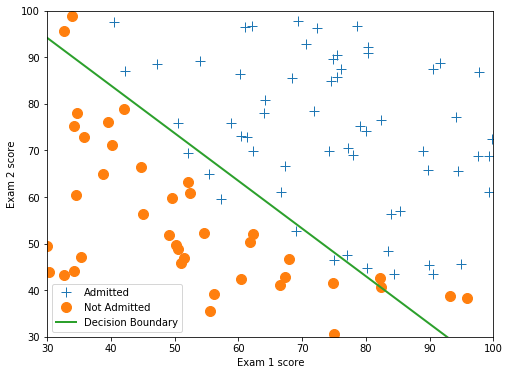

In [214]:
import scipy.optimize as op

#  Run fminunc to obtain the optimal theta
#  This function will return theta and the cost
results = op.minimize(costFunction, initial_theta, (X,y), method='TNC', options={
                'maxiter': 400
            }, jac=True)
opt_theta = results.x

# Print theta to screen
print('Cost at theta found by fminunc: {0}'.format(results.fun))
print('Expected cost (approx): 0.203')
print('Optimized theta:', opt_theta)
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201\n')

# Plot Boundary
plotDecisionBoundary(opt_theta, X, y)

<hr>

## Part 4: Predict and Accuracies
---

In [215]:
def predict(theta, X):
    """
    PREDICT Predict whether the label is 0 or 1 using learned logistic 
    regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a 
    threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """
    
    m = X.shape[0] # Number of training examples
    p = np.zeros([m, 1])

    p = sigmoid(X @ theta) >= 0.5
    
    return p

In [225]:
# Predict probability for a student with score 45 on exam 1 
# and score 85 on exam 2 

prob = sigmoid(np.array([1, 45, 85]) @ opt_theta)
print('For a student with scores 45 and 85, we predict an admission probability of {0}'\
      .format(prob))
print('Expected value: 0.775 +/- 0.002\n\n')

# Compute accuracy on our training set
p = predict(opt_theta, X)

print('Train Accuracy: {0}'.format(np.mean(np.double(p == y)) * 100))
print('Expected accuracy (approx): 89.0\n')

For a student with scores 45 and 85, we predict an admission probability of 0.7762906228281016
Expected value: 0.775 +/- 0.002


Train Accuracy: 89.0
Expected accuracy (approx): 89.0

